In [3]:
import datetime
import pytz

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplcyberpunk

from pathlib import Path
import pandas as pd
import numpy as np
from astropy.io import fits, ascii
import astropy.wcs as fitswcs
import astropy.units as u
from astropy.coordinates import EarthLocation, SkyCoord, AltAz, get_moon, Angle
from astropy.time import Time
from astropy.table import Table
import astroplan
from specutils.spectra.spectrum1d import Spectrum1D
from astropy.visualization import (MinMaxInterval, SqrtStretch, ZScaleInterval,
                                   ImageNormalize, quantity_support)
from specutils.manipulation import FluxConservingResampler

from sklearn.decomposition import PCA

_ = quantity_support()
plt.style.use("cyberpunk")
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('font', family='Impact')
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [11]:
new_disp_grid = np.arange(3700, 7000, 2) * u.AA
fluxcon = FluxConservingResampler()

In [15]:
def load_lamp_spectrum(datafile):
    t = ascii.read(datafile)
    sp = Spectrum1D(spectral_axis=(t['col1'] * u.nm).to(u.Angstrom), flux=(t['col2']/t['col2'].max()) * u.dimensionless_unscaled)
    return fluxcon(sp, new_disp_grid)

In [30]:
led_2500 = load_lamp_spectrum("poster/led_2500.txt")
led_3500 = load_lamp_spectrum("poster/led_3500.txt")
led_5000 = load_lamp_spectrum("poster/led_5000.txt")


/var/folders/vx/hkwj3_y50fgbdckq7hcv_p000000gn/T/ipykernel_42912/1214158026.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='w', alpha=0.4)


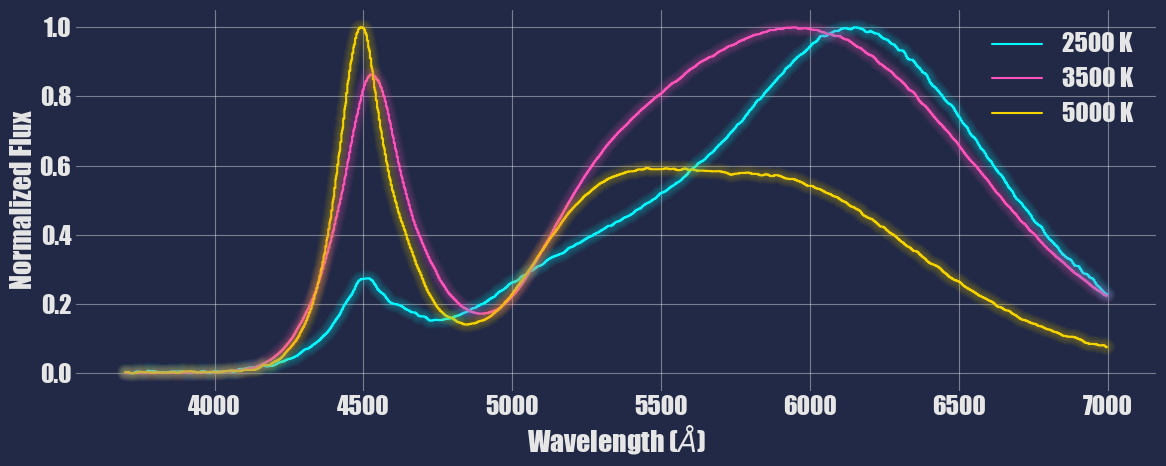

In [45]:
plt.figure(figsize=(12, 5))
plt.step(led_2500.spectral_axis, led_2500.flux, label="2500 K")
plt.step(led_3500.spectral_axis, led_3500.flux, label="3500 K")
plt.step(led_5000.spectral_axis, led_5000.flux, label="5000 K")
plt.legend()
plt.ylabel("Normalized Flux")
plt.xlabel("Wavelength ($\AA$)")
plt.tight_layout()
plt.grid(b=True, color='w', alpha=0.4)
mplcyberpunk.make_lines_glow()
plt.savefig("led_spectra.png")
plt.show()

In [37]:
cfl = load_lamp_spectrum("poster/cfl.txt")
mh = load_lamp_spectrum("poster/metal_halide.txt")
hps = load_lamp_spectrum("poster/hps.txt")
inc = load_lamp_spectrum("poster/inc_2800.txt")

/var/folders/vx/hkwj3_y50fgbdckq7hcv_p000000gn/T/ipykernel_42912/736930928.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='w', alpha=0.4)


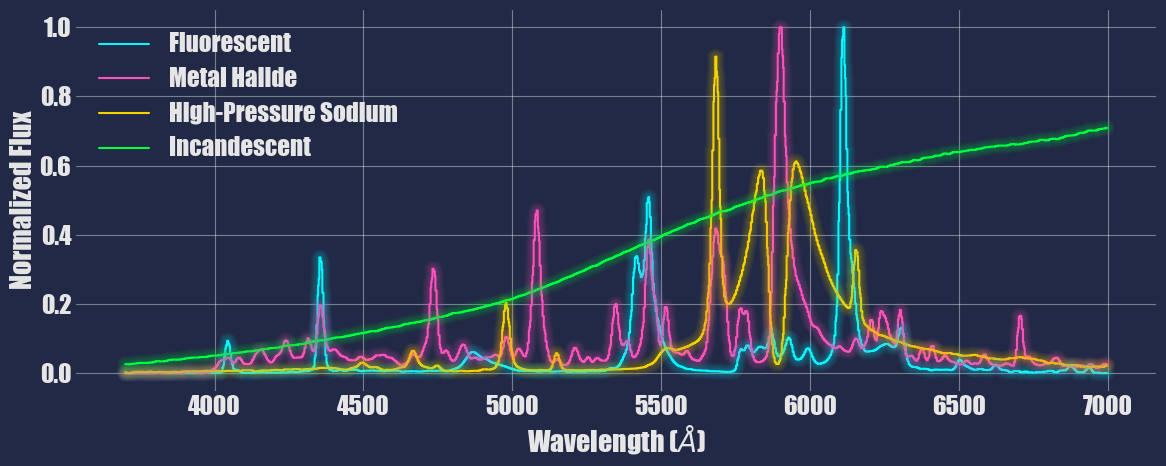

In [44]:
plt.figure(figsize=(12, 5))
plt.step(cfl.spectral_axis, cfl.flux, label="Fluorescent")
plt.step(mh.spectral_axis, mh.flux, label="Metal Halide")
plt.step(hps.spectral_axis, hps.flux, label="High-Pressure Sodium")
plt.step(inc.spectral_axis, inc.flux, label='Incandescent')
plt.legend()
plt.ylabel("Normalized Flux")
plt.xlabel("Wavelength ($\AA$)")
plt.tight_layout()
mplcyberpunk.make_lines_glow()
plt.grid(b=True, color='w', alpha=0.4)
plt.savefig("lamp_spectra.png")
plt.show()